<a href="https://colab.research.google.com/github/ishwarvenugopal/ML_Implementation/blob/master/SupportVectorMachine_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/ML_Algorithms/Data/Classification_Data.csv')
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,-2.07,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,-0.13,1
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,-0.86,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,-0.13,1
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,0.08,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,0
3,1,1,191,-1.50,0.79,0.33,1.24,1.35,17,2,-0.85,1.74,1.74,15,0.47,0.63,0.08,0.19,6.3,0.95,0
4,1,1,13,0.25,-1.19,-0.90,2.67,0.22,12,8,0.68,-0.39,1.25,25,-0.09,-2.41,-0.53,-0.77,10.5,-0.13,1


# Data Pre-processing

In [0]:
len(dataset)

500

In [0]:
dataset.isna().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
Class    0
dtype: int64

In [0]:
dataset['F20'].mode()

0   -0.13
dtype: float64

In [0]:
cols2 = ["F20"]
for col in cols2:
    dataset[col].fillna(-0.13, inplace=True)

# Splitting into Train and Test data

In [0]:
X = dataset.iloc[:, 0:20]
#X.head()
y = dataset.iloc[:, [20]]
#y.head()

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

# Feature Scaling

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Implementing SVM Classifier

In [0]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_predict = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evaluation of Results Obtained from Classifier

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        70
           1       0.60      0.44      0.51        55

    accuracy                           0.62       125
   macro avg       0.62      0.60      0.60       125
weighted avg       0.62      0.62      0.61       125



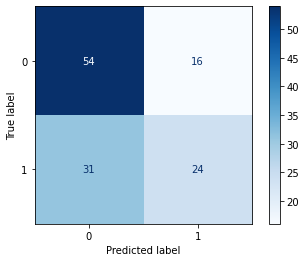

In [0]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

plot_confusion_matrix(classifier,X_test,y_test, cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict))

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer

score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(classifier, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))


Accuracy (without cross-validation) : 0.624
[0.60526316 0.76315789 0.60526316 0.55263158 0.65789474 0.7027027
 0.51351351 0.64864865 0.48648649 0.62162162]
Accuracy (after cross-validation): 0.6157183499288763 (+/- 0.0797170393789597)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
kappa_score = cohen_kappa_score(y_test, y_predict)
print("Cohen Kappa Score (before cross-validation): {}".format(kappa_score))

score3_rf = cross_val_score(classifier, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Cohen Kappa Score (before cross-validation): 0.21404682274247488


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[ 0.16909621  0.50720461  0.15929204  0.04719764  0.26268657  0.38796992
  0.00892857  0.26788432 -0.07001522  0.21752266]
Cohen Kappa Score (after cross-validation): 0.1957767320373513 (+/- 0.16545428077541588)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin